# How Has the Shinchan Movie Franchise Evolved?

This mini project explores how the Crayon Shin-chan movie franchise has changed over time. Using data from 21 official films, I examined shifts in movie length, number of theatres, action level, directors, audience reception, and external sentiment.

The analysis includes simple visualisations, comparisons across platforms (IMDb and MyAnimeList), and Reddit-based sentiment insights. While the franchise has evolved in tone, scope, and reception, it has maintained certain creative patterns that continue to resonate with fans.

## Data Validation

In [62]:
# Load and clean dataset
import pandas as pd

df = pd.read_csv("movie_shinchan.csv")

# Remove duplicated half (dataset is repeated in the 2nd half of the dataset)
df = df.iloc[:len(df)//2]

# Drop unused columns
df.drop(columns=['Awards Won', 'Guest Characters', 'Cameos/Crossovers'], inplace=True)

In [64]:
df.head()

,Title (EN),Title (JP),Year,Duration (min),Director,Screenwriter,Music Composer,Production Studio,Box Office (¥ billion),IMDb Rating,...,Main Cast (Voices),Animation Studio,Number of Theaters (Japan),Opening Weekend Earnings (¥ million),Home Video Sales (Units),Parodied Movie/Genre,Adventure Type,Action Level,Emotional Focus,Notable Catchphrases
0,Action Kamen vs. Haigure Maou,クレヨンしんちゃん アクション仮面VSハイグレ魔王,1993,92,Mitsuru Hongo,Yoshito Usui,Toshiyuki Arakawa,Shin-Ei Animation,2.2,6.8,...,"Akiko Yajima, Miki Narahashi",Shin-Ei Animation,150,320,120000,Tokusatsu parody,Superhero battle,High,"Friendship, Courage",I am Action Kamen!
1,The Secret Treasure of Buri Buri Kingdom,クレヨンしんちゃん ブリブリ王国の秘宝,1994,96,Mitsuru Hongo,Yoshito Usui,Toshiyuki Arakawa,Shin-Ei Animation,2.1,7.0,...,"Akiko Yajima, Keiji Fujiwara",Shin-Ei Animation,180,350,150000,Indiana Jones parody,Treasure hunt,Medium,Family bonds,Buri Buri~!
2,Unkokusai's Ambition,クレヨンしんちゃん 雲黒斎の野望,1995,99,Mitsuru Hongo,Yoshito Usui,Toshiyuki Arakawa,Shin-Ei Animation,1.8,7.2,...,"Akiko Yajima, Mari Mashiba",Shin-Ei Animation,200,300,140000,Historical drama parody,Time-travel adventure,Medium,"Fate, Responsibility",Time is a mystery!
3,Great Adventure in Henderland,クレヨンしんちゃん ヘンダーランドの大冒険,1996,97,Mitsuru Hongo,Yoshito Usui,Toshiyuki Arakawa,Shin-Ei Animation,2.3,7.1,...,"Akiko Yajima, Tamao Hayashi",Shin-Ei Animation,210,380,160000,Fantasy adventure parody,Magical world,High,"Bravery, Family",Welcome to Henderland!
4,Pursuit of the Balls of Darkness,クレヨンしんちゃん 暗黒タマタマ大追跡,1997,95,Mitsuru Hongo,Yoshito Usui,Toshiyuki Arakawa,Shin-Ei Animation,2.0,6.9,...,"Akiko Yajima, Michie Tomizawa",Shin-Ei Animation,190,310,130000,Spy thriller parody,Urban mystery,Medium,"Teamwork, Humor",These balls are trouble!


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Title (EN)                            21 non-null     object 
 1   Title (JP)                            21 non-null     object 
 2   Year                                  21 non-null     int64  
 3   Duration (min)                        21 non-null     int64  
 4   Director                              21 non-null     object 
 5   Screenwriter                          21 non-null     object 
 6   Music Composer                        21 non-null     object 
 7   Production Studio                     21 non-null     object 
 8   Box Office (¥ billion)                21 non-null     float64
 9   IMDb Rating                           21 non-null     float64
 10  MyAnimeList Score                     21 non-null     float64
 11  Main Theme           

* The original dataset was duplicated—each row appeared twice in the same order.
* To correct this, I sliced the dataframe to keep only the first half.
* Also dropped three nearly-empty columns that were not useful for analysis.


In [71]:
# Count total duplicate rows
df.duplicated().sum()

0

In [75]:
# Count of nulls in each column
df.isnull().sum()

Title (EN)                              0
Title (JP)                              0
Year                                    0
Duration (min)                          0
Director                                0
Screenwriter                            0
Music Composer                          0
Production Studio                       0
Box Office (¥ billion)                  0
IMDb Rating                             0
MyAnimeList Score                       0
Main Theme                              0
Synopsis                                0
Key Characters Introduced               0
Main Cast (Voices)                      0
Animation Studio                        0
Number of Theaters (Japan)              0
Opening Weekend Earnings (¥ million)    0
Home Video Sales (Units)                0
Parodied Movie/Genre                    0
Adventure Type                          0
Action Level                            0
Emotional Focus                         0
Notable Catchphrases              

## 1. Release & Format Consistency

Most Shinchan movies follow a reliable format: one film released per year, with a consistent runtime and wide release across Japan. But has this consistency changed over time?

We explore:
- Movie duration trends
- Number of theaters over the years


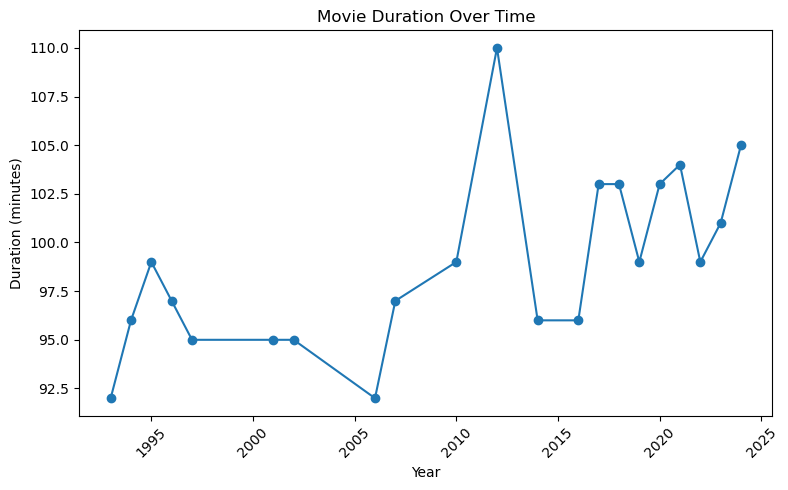

In [112]:
# Line plot of duration (min) over time
plt.figure(figsize=(8,5))
plt.plot(df['Year'], df['Duration (min)'], marker='o', linestyle='-')
plt.title("Movie Duration Over Time")
plt.xlabel("Year")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There is a general upward trend in Movie Durations over time.

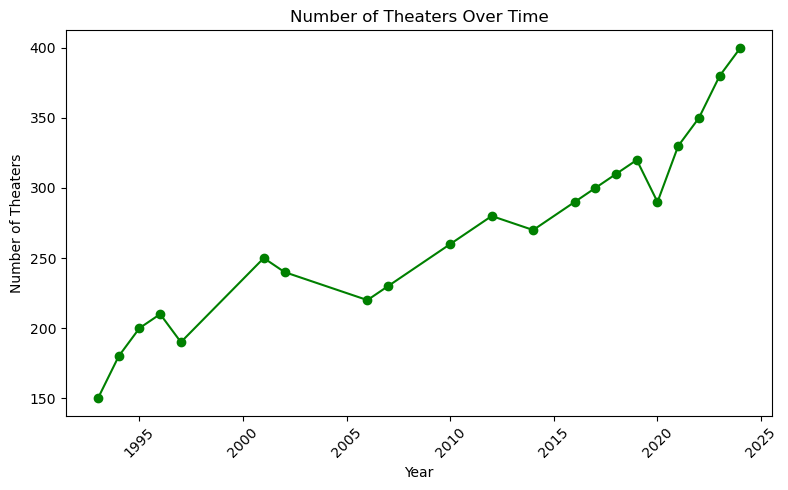

In [117]:
# Line plot of number of theaters over time
plt.figure(figsize=(8,5))
plt.plot(df['Year'], df['Number of Theaters (Japan)'], marker='o', linestyle='-', color='green')
plt.title("Number of Theaters Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Theaters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observations

Shinchan movies have followed an annual release pattern since 1993. While the format has stayed mostly consistent, there are some subtle shifts over time.

- **Movie Duration** has hovered around 95–100 minutes in earlier years, but more recent releases show a slight increase and wider variation, with some going beyond 105 minutes.
- **Theatrical Reach** has grown steadily. The number of theaters rose from ~150 in the early 1990s to ~400 by 2024, suggesting increasing national distribution and possibly higher popularity.

This shows that while the franchise kept a stable release rhythm and movie length, its scale of distribution has expanded noticeably over time.


## 2. Creative Direction

Beyond just directing more films, do certain directors influence the movie's tone, theme, or performance?

Here we look at:
- Number of movies directed by each director
- Director vs Audience Ratings
- Average box office earnings by director
- Their preferred themes and adventure types
- Trends in action level choices

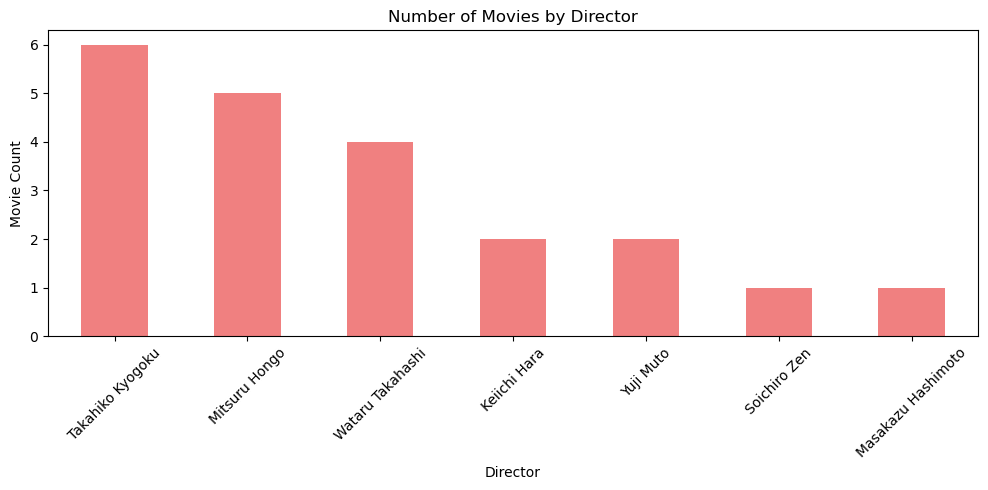

In [87]:
# Number of movies directed by each director
plt.figure(figsize=(10,5))
df['Director'].value_counts().plot(kind='bar', color='lightcoral')
plt.title("Number of Movies by Director")
plt.xlabel("Director")
plt.ylabel("Movie Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Takahiko Kyogoku and Mitsuru Hongo directed the most movies. This shows some consistency in creative direction.

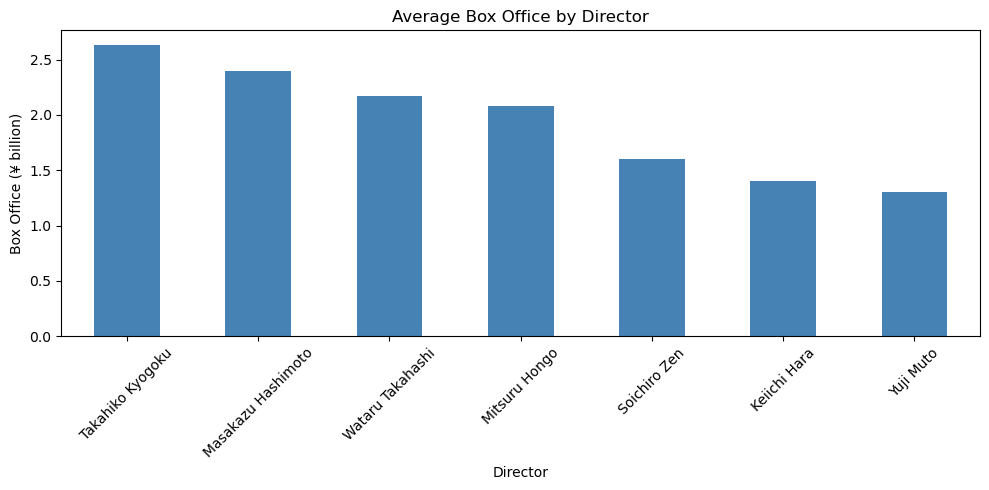

In [121]:
# Box office average per director
box_office_by_director = df.groupby('Director')['Box Office (¥ billion)'].mean().sort_values(ascending=False)

box_office_by_director.plot(kind='bar', figsize=(10,5), color='steelblue')
plt.title("Average Box Office by Director")
plt.ylabel("Box Office (¥ billion)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Takahiko Kyogoku directed the most number of movies, and also generated the highest average box office earnings. On the other hand, Mitsuru Hongo directed the second most number of movies and delivered solid box office performance—though slightly behind the top three.

In [143]:
# Director vs Audience Ratings (IMDb or MAL)
df.groupby('Director')[['IMDb Rating', 'MyAnimeList Score']].mean().sort_values(by='IMDb Rating', ascending=False)

,IMDb Rating,MyAnimeList Score
Director,,
Keiichi Hara,7.95,8.20
Takahiko Kyogoku,7.45,7.75
Masakazu Hashimoto,7.40,7.70
Soichiro Zen,7.30,7.60
Wataru Takahashi,7.05,7.40
Mitsuru Hongo,7.00,7.30
Yuji Muto,6.60,6.95


### Director vs Audience Ratings

While box office revenue reflects commercial success, IMDb and MyAnimeList scores highlight how audiences received each director’s work.

- **Keiichi Hara** leads with the highest average ratings on both IMDb (7.95) and MAL (8.20), despite directing fewer films.
- **Takahiko Kyogoku**, the most prolific and commercially successful director, also ranks highly with strong average ratings.
- **Mitsuru Hongo**, though responsible for many films, has lower average ratings compared to his peers.
- **Yuji Muto** appears to be the lowest-rated overall, though the sample size is likely small.

This suggests that while some directors consistently balance box office and audience appeal, others may resonate more with the market than with viewers—or vice versa.

In [133]:
# Cross-tab of directors vs main themes
pd.crosstab(df['Director'], df['Main Theme'])

Main Theme,"Adventure, Family","Aliens, Comedy","Art, Fantasy","Dreams, Adventure","Espionage, Family","Family, Adventure","Family, Technology","Fantasy, Courage",Heroism vs. Evil,"History, Sacrifice",...,"Multiverse, Action","Music, Identity","Mystery, Comedy","Mystery, School","Ninja, Supernatural","Nostalgia, Rebellion","Romance, Time Travel","Space Adventure, Friendship","Technology, Family","Time Travel, Destiny"
Director,,,,,,,,,,,,,,,,,,,,,
Keiichi Hara,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
Masakazu Hashimoto,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Mitsuru Hongo,1,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
Soichiro Zen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Takahiko Kyogoku,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
Wataru Takahashi,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yuji Muto,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [135]:
pd.crosstab(df['Director'], df['Adventure Type'])

Adventure Type,Creative world,Culinary battle,Dimensional chaos,Dream exploration,Dystopian adventure,Exotic journey,Futuristic comedy,Historical war,Intergalactic journey,Magical world,...,Robotic showdown,School investigation,Sci-fi comedy,Spy mission,Superhero battle,Supernatural battle,Techno-family,Time-travel adventure,Treasure hunt,Urban mystery
Director,,,,,,,,,,,,,,,,,,,,,
Keiichi Hara,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Masakazu Hashimoto,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Mitsuru Hongo,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,1
Soichiro Zen,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Takahiko Kyogoku,1,0,1,0,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
Wataru Takahashi,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
Yuji Muto,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


While I explored the relationship between directors and the movie's Main Theme and Adventure Type, the data suggests that most movies had distinct creative directions. Each director appears to have worked on unique themes or adventure types, making it difficult to draw consistent patterns.

This reflects the franchise’s broad thematic variety, even as the core structure remains familiar.


In [127]:
# Count of action level per director
pd.crosstab(df['Director'], df['Action Level']).style.background_gradient()

Action Level,High,Low,Medium
Director,,,
Keiichi Hara,2,0,0
Masakazu Hashimoto,1,0,0
Mitsuru Hongo,2,0,3
Soichiro Zen,0,1,0
Takahiko Kyogoku,3,1,2
Wataru Takahashi,1,1,2
Yuji Muto,0,1,1


### Director vs Action Level

Compared to Main Theme and Adventure Type, directors show clearer patterns in action level choices.

- **Takahiko Kyogoku** shows a strong preference for high-action films (3 out of 6).
- **Mitsuru Hongo** leans toward medium-action movies (3 out of 5).
- **Wataru Takahashi** shows the most balanced range across all three levels.
- Directors like **Soichiro Zen** and **Yuji Muto** tend to direct lower-action or softer-paced movies.

These differences suggest that while story themes vary widely, individual directors may bring a more consistent tone in terms of pacing and energy.

## 3. Audience Reception

How have audiences responded to Shinchan movies?

We compare:
- IMDb and MyAnimeList score distributions
- Top-rated films
- Relationship between opening weekend earnings and total box office

This gives a glimpse into what viewers enjoy and how early momentum may affect commercial success.


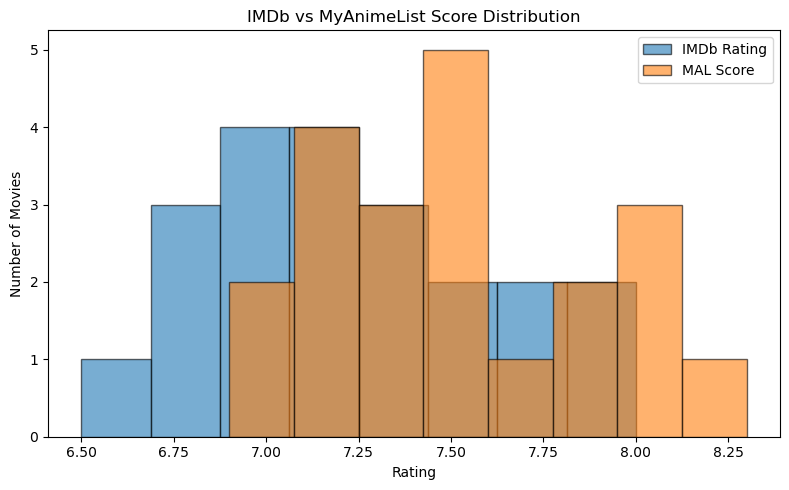

In [82]:
# Distribution of IMDb Ratings and MyAnimeList

plt.figure(figsize=(8,5))

df['IMDb Rating'].plot(kind='hist', bins=8, alpha=0.6, label='IMDb Rating', edgecolor='black')
df['MyAnimeList Score'].plot(kind='hist', bins=8, alpha=0.6, label='MAL Score', edgecolor='black')

plt.title("IMDb vs MyAnimeList Score Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.legend()
plt.tight_layout()
plt.show()


This chart compares how Shinchan movies are rated across two platforms:

* IMDb scores (blue) are slightly more centered between 6.5–7.5
* MyAnimeList scores (orange) skew higher overall, with a noticeable cluster around 7.5–8.0
* This suggests that the anime-focused audience on MAL tends to rate Shinchan movies more favourably than the general audience on IMDb.



In [225]:
# Top 5 Movies by IMDb Ratings with Director info
top_imdb = df[['Title (EN)', 'Year', 'Director', 'IMDb Rating', 'MyAnimeList Score']]\
    .sort_values(by='IMDb Rating', ascending=False)\
    .head(5)

top_imdb

,Title (EN),Year,Director,IMDb Rating,MyAnimeList Score
5,The Storm Called: The Adult Empire Strikes Back,2001,Keiichi Hara,8.0,8.3
6,The Storm Called: The Battle of the Warring St...,2002,Keiichi Hara,7.9,8.1
20,Shin-chan: Robot Dad vs. Rebel Dad,2024,Takahiko Kyogoku,7.8,8.1
19,Shin-chan: New Dimension! Crayon Wars,2023,Takahiko Kyogoku,7.7,8.0
18,Shin-chan: Mononoke Ninja Chinpuden,2022,Takahiko Kyogoku,7.6,7.9


In [227]:
# Top 5 Movies by MyAnimeList
top_mal = df[['Title (EN)', 'Year', 'Director', 'IMDb Rating', 'MyAnimeList Score']]\
            .sort_values(by='MyAnimeList Score', ascending=False)\
            .head(5)
top_mal


,Title (EN),Year,Director,IMDb Rating,MyAnimeList Score
5,The Storm Called: The Adult Empire Strikes Back,2001,Keiichi Hara,8.0,8.3
20,Shin-chan: Robot Dad vs. Rebel Dad,2024,Takahiko Kyogoku,7.8,8.1
6,The Storm Called: The Battle of the Warring St...,2002,Keiichi Hara,7.9,8.1
19,Shin-chan: New Dimension! Crayon Wars,2023,Takahiko Kyogoku,7.7,8.0
18,Shin-chan: Mononoke Ninja Chinpuden,2022,Takahiko Kyogoku,7.6,7.9


### Audience Reception

To understand how audiences responded to Shinchan movies, I compared IMDb and MyAnimeList ratings.

Interestingly, both platforms highlight the same five films as the highest-rated entries in the franchise. This suggests strong agreement across different viewer bases.

- *The Storm Called: The Adult Empire Strikes Back* (2001) consistently ranks first.
- Newer releases like *Robot Dad vs. Rebel Dad* (2024) and *New Dimension! Crayon Wars* (2023) also perform well.
- Differences in order (e.g. IMDb vs MAL rank 2 and 3) are minimal.

This alignment reinforces the credibility of the ratings and highlights a few standout titles worth watching.


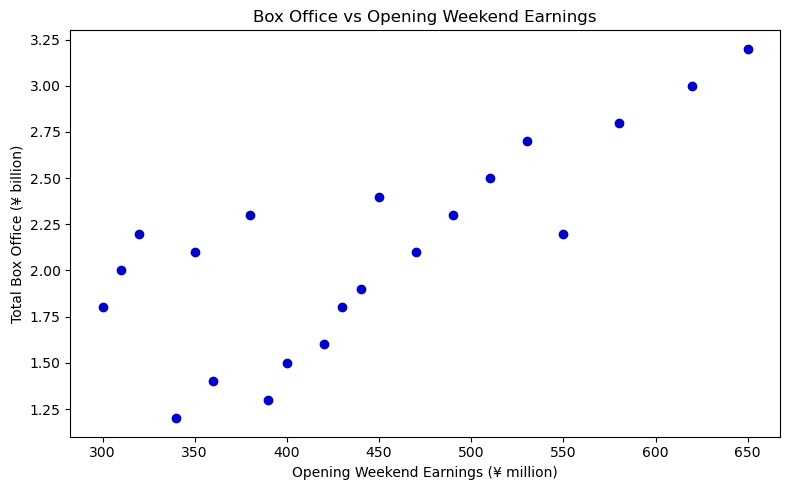

In [89]:
# Compare overall box office and opening weekend earnings
plt.figure(figsize=(8,5))
plt.scatter(df['Opening Weekend Earnings (¥ million)'], df['Box Office (¥ billion)'], color='mediumblue')
plt.title("Box Office vs Opening Weekend Earnings")
plt.xlabel("Opening Weekend Earnings (¥ million)")
plt.ylabel("Total Box Office (¥ billion)")
plt.tight_layout()
plt.show()

There's a generally positive relationship—movies with strong opening weekends often see higher overall box office, though not perfectly linear. Some movies sustained long runs despite average openings.

## 4. What Do Fans Say? – Reddit Sentiment on *The Adult Empire Strikes Back*

Beyond IMDb and MyAnimeList scores, I wanted to understand how fans talk about Shinchan’s highest-rated film online.

To do this, I scraped Reddit posts and comments that mention *The Storm Called: The Adult Empire Strikes Back*. Reddit is an ideal source for unfiltered, fan-driven commentary and reactions.

Using sentiment analysis, I classified user comments as positive, neutral, or negative to get a general sense of how people feel about the movie in their own words.


In [163]:
# Install required packages
#!pip install praw textblob

In [186]:
# Reddit API Setup
# To use this, you’ll need to:
# 1. Go to https://www.reddit.com/prefs/apps and create a 'script' app
# 2. Copy your own client_id, client_secret, and set a user_agent (any short description)
# 3. Paste your values into the fields below
# NOTE: Do not share your keys publicly – keep them private for security.

# Reddit Sentiment Data
# Reddit comments were scraped in a separate private notebook using the Reddit API (PRAW).
# API credentials were kept private for security reasons.
# The resulting dataset was exported as 'reddit_comments_shinchan_adult_empire.csv' and loaded here for analysis.

In [188]:
# import praw
# import pandas as pd

# # Reddit API credentials 
# reddit = praw.Reddit(
#     client_id='YOUR_CLIENT_ID',
#     client_secret='YOUR_CLIENT_SECRET',
#     user_agent='shinchan-sentiment-script'
# )

# # Search within anime-related subreddits
# query = "Shinchan Adult Empire"
# subreddits = "anime+movies+Shinchan"

# submissions = reddit.subreddit(subreddits).search(query, limit=30)

# # Extract relevant comments
# comments_list = []
# for submission in submissions:
#     submission.comments.replace_more(limit=0)
#     for comment in submission.comments.list():
#         comments_list.append(comment.body)

# # Convert to DataFrame
# comments_df = pd.DataFrame(comments_list, columns=["comment"])

# # Optional: filter for comments that mention 'shinchan' to improve relevance
# comments_df = comments_df[comments_df['comment'].str.contains("shinchan", case=False, na=False)]

# # Reset index
# comments_df.reset_index(drop=True, inplace=True)

# # Preview and save
# print(f"Filtered comments collected: {len(comments_df)}")
# comments_df.head()
# comments_df.to_csv("reddit_comments_shinchan_adult_empire.csv", index=False)


Only 32 Reddit comments matched the query after filtering for relevance. This sample is small, so conclusions should be treated as exploratory.

In [193]:
# Load Reddit comments CSV
comments_df = pd.read_csv("reddit_comments_shinchan_adult_empire.csv")

# Preview the first few rows
comments_df.head()

,comment
0,Bro ShinChan is still around!?!
1,"Good i live in india, shinchan is airing 24/7 ..."
2,bruh shinchan havent watch it ever since I was...
3,Shinchan my childhood
4,"New episodes are still airing, now shinchan ha..."


In [195]:
# !pip install vaderSentiment

In [197]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [199]:
# Get compound score for each comment
comments_df['compound'] = comments_df['comment'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Classify into Positive, Neutral, Negative
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

comments_df['sentiment'] = comments_df['compound'].apply(classify_sentiment)

In [201]:
comments_df[['comment', 'compound', 'sentiment']].head()

,comment,compound,sentiment
0,Bro ShinChan is still around!?!,0.0000,Neutral
1,"Good i live in india, shinchan is airing 24/7 ...",-0.4118,Negative
2,bruh shinchan havent watch it ever since I was...,0.0000,Neutral
3,Shinchan my childhood,0.0000,Neutral
4,"New episodes are still airing, now shinchan ha...",0.8271,Positive


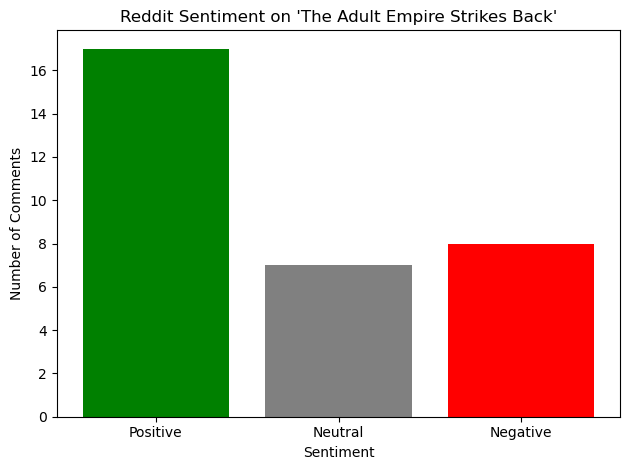

In [205]:
# Count sentiment categories
sentiment_counts = comments_df['sentiment'].value_counts()

# Define desired order
order = ['Positive', 'Neutral', 'Negative']
colors = ['green', 'grey', 'red']

# Reindex to match desired order
sentiment_counts = comments_df['sentiment'].value_counts().reindex(order)

# Plot
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.title("Reddit Sentiment on 'The Adult Empire Strikes Back'")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()

Findings: 
* Majority of comments were positive (17 out of 32)
* A small number were neutral (7), and negative sentiments were also present (8)
* Sentiment aligns with the film’s high ratings on both IMDb (8.0) and MyAnimeList (8.3)

In [211]:
#pip install rake-nltk nltk

In [213]:
from rake_nltk import Rake
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annorang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [215]:
# Combine all comments into a single string
text = " ".join(comments_df['comment'].dropna().tolist())

# Initialize RAKE
r = Rake()

# Extract keywords
r.extract_keywords_from_text(text)
keywords_with_scores = r.get_ranked_phrases_with_scores()


In [217]:
# Show top 15 keywords
for score, keyword in keywords_with_scores[:15]:
    print(f"{score:>3} - {keyword}")


70.6484593837535 - many good shinchan movies man ig adult empire strikes back
51.26274509803922 - watching raw shinchan episodes without subtitles would basically mean
43.8921568627451 - lol shinchan adult empire strikes back shinchan
34.86274509803922 - never dislike shinchan 🙂 adult empire
29.76666666666667 - upload raw episodes without subtitles though
25.0 - action kamen vs leotard devil
24.666666666666668 - every universe 🔥 guys tell
24.583333333333332 - people outside japan cant really see
24.252380952380953 - watch jp original dub every week
23.529411764705884 - rewatch shinchan buri buri charge
22.058823529411764 - shinchan film ☹️☹️ shinchan signs
22.0 - even helping harry get ready
20.95238095238095 - original dub till shin jigen
19.029411764705884 - never hate shinchan chill bro
16.0 - personally find alien shiriri


/var/folders/8l/bhb7fg1j09342r40p3bdv6cr0000gn/T/ipykernel_75120/3938165130.py:10: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
/var/folders/8l/bhb7fg1j09342r40p3bdv6cr0000gn/T/ipykernel_75120/3938165130.py:10: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


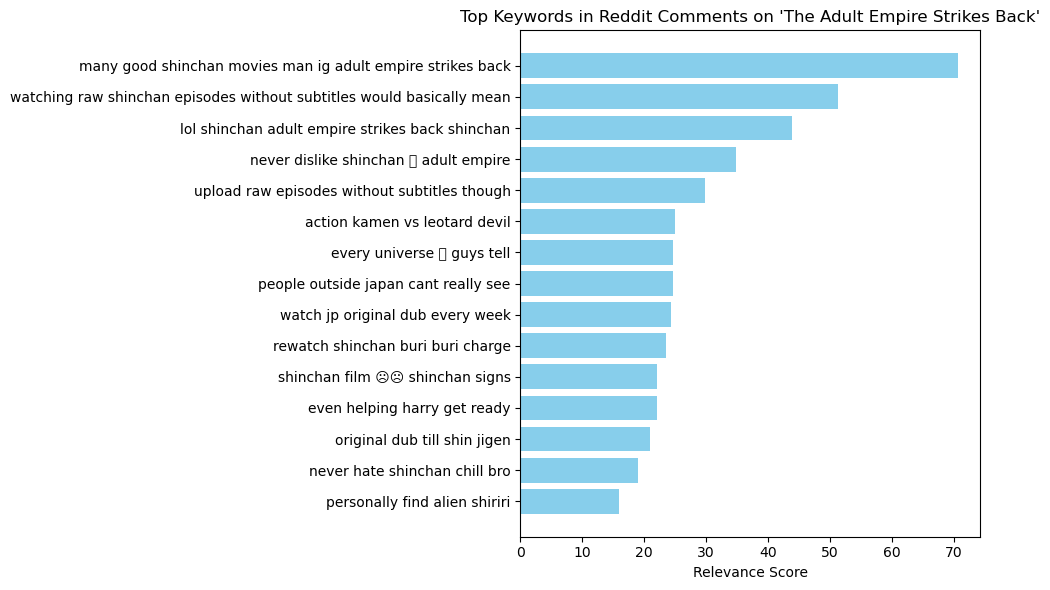

In [219]:
keywords_df = pd.DataFrame(keywords_with_scores, columns=['Score', 'Keyword'])
top_keywords = keywords_df.head(15)

# Bar plot

plt.figure(figsize=(10,6))
plt.barh(top_keywords['Keyword'][::-1], top_keywords['Score'][::-1], color='skyblue')
plt.title("Top Keywords in Reddit Comments on 'The Adult Empire Strikes Back'")
plt.xlabel("Relevance Score")
plt.tight_layout()
plt.show()


### Insights from Reddit Keyword Extraction

The keyword frequency chart highlights what viewers are most vocal about in relation to *The Adult Empire Strikes Back*:

- **Strong Nostalgia and Affection**  
  Phrases like *"never dislike Shinchan"*, *"many good Shinchan movies"*, and *"never hate Shinchan chill bro"* reflect a deep emotional connection and enduring fan loyalty.

- **Access and Subtitling Issues**  
  Frequent mentions of *"raw episodes without subtitles"* suggest that many users outside Japan struggle to find translated or officially distributed versions.

- **Scene and Character Recall**  
  Specific mentions like *"action kamen vs leotard devil"* and *"alien shiriri"* show that fans remember and discuss detailed plot points, reinforcing the film’s impact.

- **Preference for Original Dub**  
  The recurring phrase *"original dub"* points to a clear preference for the Japanese voice cast, with some fans watching the same content weekly.

- **Ongoing Rewatch Value**  
  Mentions of *"rewatch"*, *"every week"*, and character names like *"buri buri charge"* suggest long-term engagement and repeated viewership.

These findings support the earlier sentiment analysis—this film holds a lasting place in fans’ memories and remains widely discussed online, even decades after release.
